<a href="https://colab.research.google.com/github/LeonOsman/Library/blob/main/Osman_Onur_AKIRMAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:

# Tensorflow kütüphanesini yükle
import tensorflow as tf
from tensorflow import keras
from keras import layers
print("TensorFlow version:", tf.__version__)
from keras.models import Sequential
 
# importing various types of hidden layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
 
# Adam optimizer kütüphanesini ekle
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

TensorFlow version: 2.9.2


In [26]:
# Mount your google drive in google colab -bu adımı atla
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#!ls /content/drive/My\ Drive/*.xlsx - bu adımı atla

'/content/drive/My Drive/ER-84_Commissioning _Schedule.xlsx'
'/content/drive/My Drive/Nobel İlaç İş Başvuru Formu.xlsx'
'/content/drive/My Drive/Veriseti.xlsx'


In [27]:
#bilgisayardan csv dosyası yükleme
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving Veriseti.csv to Veriseti (3).csv


In [28]:
	
df = pd.read_csv("Veriseti.csv")
display(df)

,Makine Hizi RPM,Mandolum,KovanSicaklik C,KalipSicaklik C,Urun Miktari kgdak,HataDurumu
0,10,15,91,95,41,0
1,10,23,91,95,41,1
2,10,25,91,93,41,1
3,10,27,88,94,42,1
4,10,32,88,92,42,1
...,...,...,...,...,...,...
1083,35,61,88,96,62,1
1084,35,66,85,98,63,1
1085,35,74,84,92,64,1
1086,35,77,82,89,63,1


In [29]:
# column order in CSV file
column_names = ['Makine Hizi', 'Mandolum', 'KovanSicaklik C', 'KalıpSicaklik C', 'Urun Miktari kgdak', 'HataDurumu']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['Makine Hizi', 'Mandolum', 'KovanSicaklik C', 'KalıpSicaklik C', 'Urun Miktari kgdak']
Label: HataDurumu


In [13]:
class_names = ['0', '1']

In [30]:
df.head()

,Makine Hizi RPM,Mandolum,KovanSicaklik C,KalipSicaklik C,Urun Miktari kgdak,HataDurumu
0,10,15,91,95,41,0
1,10,23,91,95,41,1
2,10,25,91,93,41,1
3,10,27,88,94,42,1
4,10,32,88,92,42,1


In [31]:
df.describe()

,Makine Hizi RPM,Mandolum,KovanSicaklik C,KalipSicaklik C,Urun Miktari kgdak,HataDurumu
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,22.170956,60.586397,75.447610,76.801471,51.538603,0.377757
std,7.679421,20.003401,8.587823,10.143547,7.318763,0.485049
min,10.000000,14.000000,56.000000,60.000000,40.000000,0.000000
25%,15.000000,45.000000,68.000000,68.000000,45.000000,0.000000
50%,22.000000,66.000000,76.000000,77.000000,51.000000,0.000000
75%,29.000000,76.000000,83.000000,84.000000,58.000000,1.000000
max,35.000000,85.000000,96.000000,99.000000,68.000000,1.000000


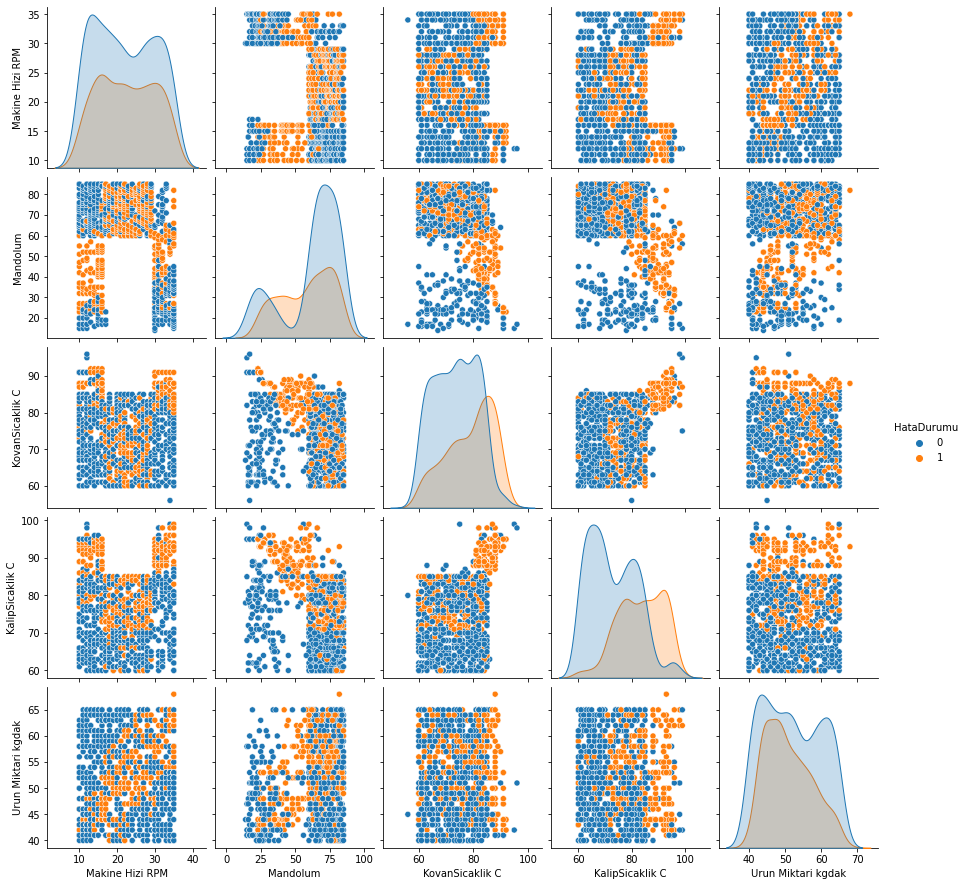

In [34]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from joblib import dump, load
sns.pairplot(df, hue='HataDurumu');

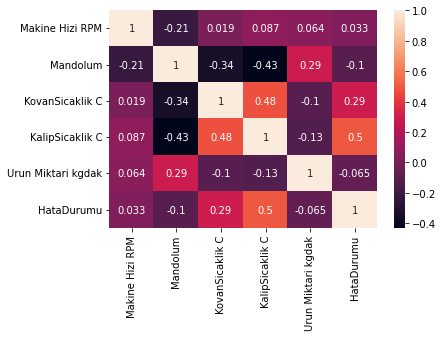

In [35]:
sns.heatmap(df.corr(), annot=True)

In [69]:
df['HataDurumu_encod'] = df['HataDurumu'].apply(lambda x: 0 if x == '0' else 1 if x == '1' else 2)
df['HataDurumu_encod'].unique()
y = df[['HataDurumu']] # target attributes 
X = df.iloc[:, 0:5] # input attributes
X.head()

,Makine Hizi RPM,Mandolum,KovanSicaklik C,KalipSicaklik C,Urun Miktari kgdak
0,10,15,91,95,41
1,10,23,91,95,41
2,10,25,91,93,41
3,10,27,88,94,42
4,10,32,88,92,42


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,
                                                    random_state=0, stratify=y)

np.shape(y_train)

(326, 1)

In [71]:
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

KNeighborsClassifier()

In [75]:
print (X_test.iloc[0:1])

     Makine Hizi RPM  Mandolum  KovanSicaklik C  KalipSicaklik C  \
669               25        83               62               70   

     Urun Miktari kgdak  
669                  59  


In [76]:
m.predict(X_test.iloc[0:1])

array([1])

In [73]:
m.score(X_test, y_test)
confusion_matrix(y_test, m.predict(X_test))


array([[410,  64],
       [ 44, 244]])